In [1]:
from KMeans import KMeans
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.cluster as cluster

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
cls = KMeans(max_iter=100, n_clusters=3, random_state=100, n_init=2)
cls.fit(X, plot = False)

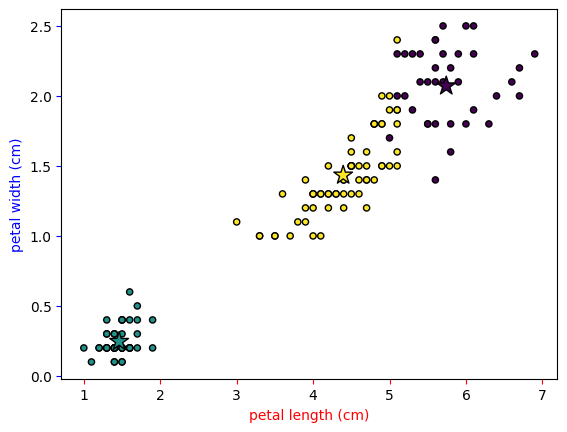

In [4]:
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
fig, ax = plt.subplots()
# plt.figure(facecolor="white", edgecolor="purple")

ax.set_xlabel(iris.feature_names[2], c = "red")
ax.set_ylabel(iris.feature_names[3], c = "blue")

ax.tick_params("x", color = "red")
ax.tick_params("y", color = "blue")

ax.scatter(X[:,2], X[:,3], c = cls.labels, edgecolors="black", s = 20)
ax.scatter(cls.centroids[:,2], cls.centroids[:,3], c = range(3), s = 200, edgecolors = "black", marker = "*")
plt.show()

In [5]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df["target"] = pd.Series(iris.target)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
new_instance = np.array([[3,3,1.5, 0.2],
                         [3,3,4, 1.5]])
pred_value = cls.predict(new_instance)
pred_value

array([1, 2], dtype=int64)

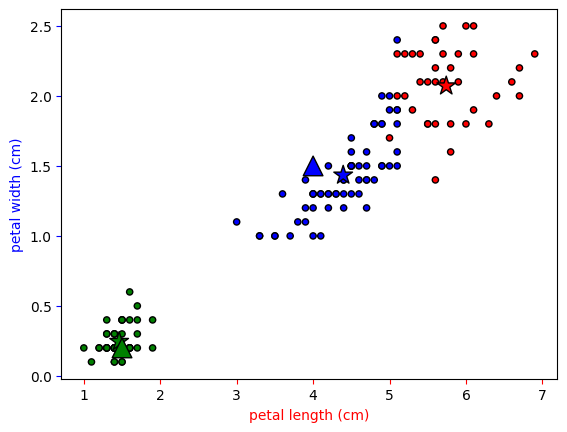

In [7]:
cmap = ListedColormap(["red", "green", "blue"]) #(red, green, blue)
color_dict = {
    0: "red",
    1: "green",
    2: "blue",
}

colors = [color_dict[pred_value[i]] for i in range(len(pred_value))]
    
fig, ax = plt.subplots()
# plt.figure(facecolor="white", edgecolor="purple")
ax.set_xlabel(iris.feature_names[2], c = "red")
ax.set_ylabel(iris.feature_names[3], c = "blue")

ax.tick_params("x", color = "red")
ax.tick_params("y", color = "blue")

ax.scatter(X[:,2], X[:,3], c = cls.labels, cmap = cmap, edgecolors="black", s = 20)
ax.scatter(cls.centroids[:,2], cls.centroids[:,3], c = range(3), cmap = cmap,s = 200, edgecolors = "black", marker = "*")
ax.scatter(new_instance[:,2], new_instance[:,3], c = colors, s = 200, edgecolors = "black", marker = "^")

plt.show()

In [8]:
import sklearn.cluster as cluster

wcss_custom = []
K = range(1,6)
for k in K:
    kmeans_custom = KMeans(n_clusters=k, max_iter=100)
    kmeans_custom.fit(X)
    wcss_custom.append(kmeans_custom.inertia)

wcss_sklearn = []
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, n_init="auto")
    kmeanModel.fit(X)
    wcss_sklearn.append(kmeanModel.inertia_)
    


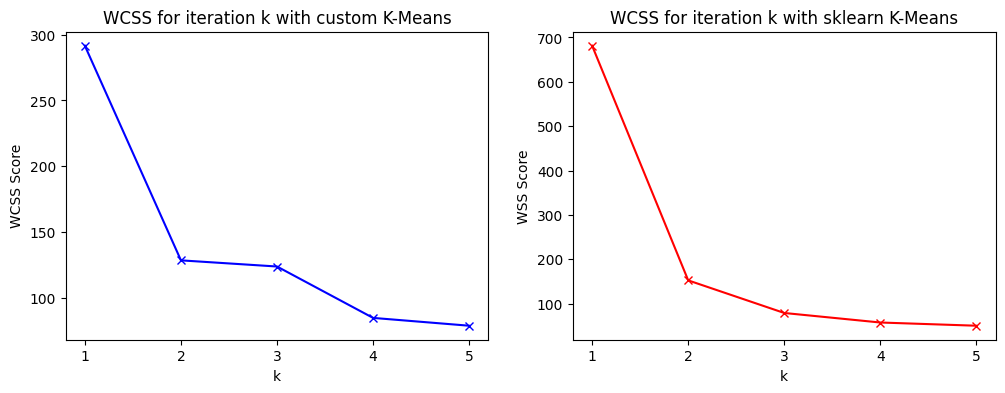

<Figure size 1600x800 with 0 Axes>

In [9]:
# Plot elbow method for custom kMeans

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

plt.figure(figsize=(16, 8))
ax1.set_title("WCSS for iteration k with custom K-Means")
ax1.plot(K, wcss_custom, "bx-")
ax1.set_xlabel("k")
ax1.set_ylabel("WCSS Score")
ax1.set_xticks(K)


# Plot elbow method for sklearn kMeans
ax2.set_title("WCSS for iteration k with sklearn K-Means")
ax2.plot(K, wcss_sklearn, 'rx-')
ax2.set_xlabel('k')
ax2.set_ylabel('WSS Score')
ax2.set_xticks(K)

plt.show()

In [10]:
centroids = np.zeros((cls.n_clusters, X.shape[1]))
centroids

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [11]:
centroids[0] = np.random.default_rng().choice(X)
centroids

array([[7.7, 2.8, 6.7, 2. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ]])